In [22]:
import galsim
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Uniform, Beta

### Simulating galaxies with shear

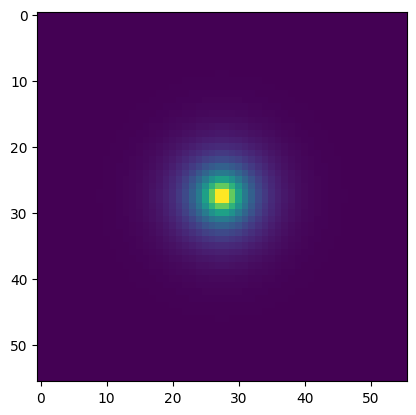

In [23]:
# No shear or convergence
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
_ = plt.imshow(gal.drawImage().array)

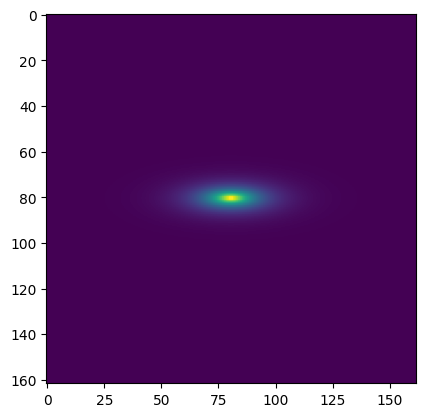

In [24]:
# Shear in direction 1
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0.5, g2=0)
_ = plt.imshow(gal.drawImage().array)

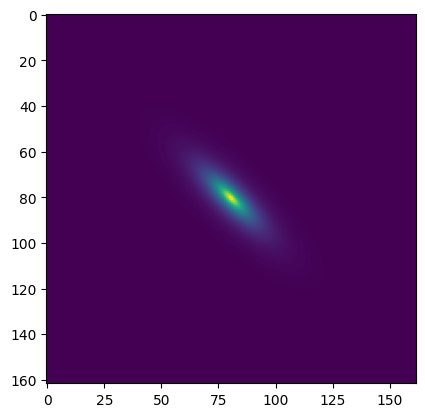

In [25]:
# Shear in direction 2
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0, g2=0.5)
_ = plt.imshow(gal.drawImage().array)

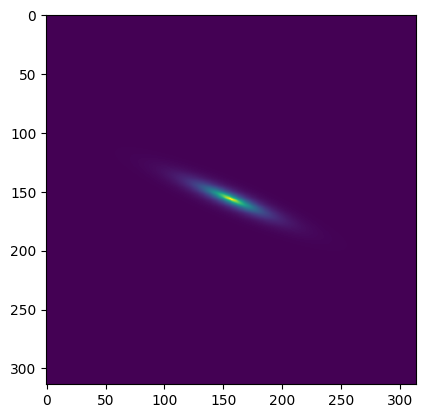

In [26]:
# Shear in directions 1 and 2
gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
gal = gal.shear(g1=0.5, g2=0.5)
_ = plt.imshow(gal.drawImage().array)

gamma1 = -0.3487502336502075
gamma2 = 0.34469443559646606
kappa = 0.00814889371395111 

g1 = -0.3516155183315277
g2 = 0.3475264012813568
mu = 1.345301866531372


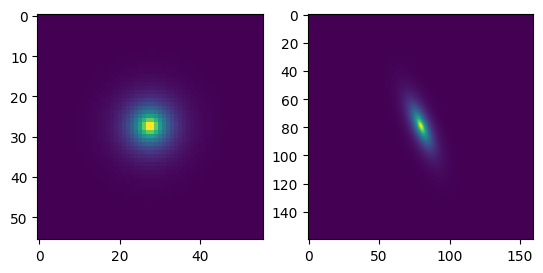

In [27]:
# Lensing
gamma1 = Uniform(-0.5, 0.5).sample()
gamma2 = Uniform(-0.5, 0.5).sample()
kappa = Uniform(0, 0.25).sample()
print('gamma1 =', gamma1.item())
print('gamma2 =', gamma2.item())
print('kappa =', kappa.item(), '\n')

g1 = gamma1/(1-kappa)
g2 = gamma2/(1-kappa)
mu = 1/((1-kappa)**2 - gamma1**2 - gamma2**2)
print('g1 =', g1.item())
print('g2 =', g2.item())
print('mu =', mu.item())

fig, (unlensed, lensed) = plt.subplots(nrows=1, ncols=2)

gal = galsim.Exponential(flux=1e5, half_light_radius=2.7)
_ = unlensed.imshow(gal.drawImage().array)
gal_lensed = gal.lens(g1=g1, g2=g2, mu=mu)
_ = lensed.imshow(gal_lensed.drawImage().array)

---

### Simulating shear fields

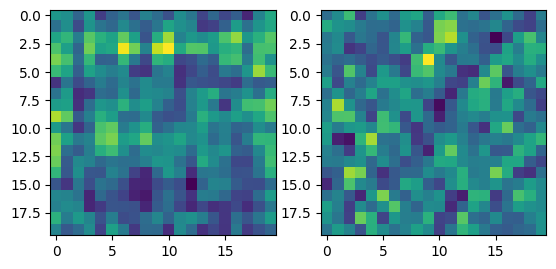

In [28]:
grid_size = 10.  # Define the total grid extent, in degrees
ngrid = 20      # Define the number of grid points in each dimension: (ngrid x ngrid)
n_ell = 15       # Choose the number of logarithmic bins in ell or k for outputs

# Define a lookup-table for the power spectrum as a function of k based on the outputs
# of iCosmo (see demo11.py for more description of how this was generated).
my_tab = galsim.LookupTable.from_file('../cosmo-fid.zmed1.00.out')

# Generate a galsim.PowerSpectrum with this P(k), noting the units.
my_ps = galsim.PowerSpectrum(my_tab, units=galsim.radians)

# Build a grid of shear values with the desired parameters.
g1, g2 = my_ps.buildGrid(grid_spacing=grid_size/ngrid, ngrid=ngrid, units=galsim.degrees)

fig, (one, two) = plt.subplots(nrows=1,ncols=2)
_ = one.imshow(g1)
_ = two.imshow(g2)